# **Salary Prediction using KNN Regression**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> **1. Data Pre-processing :**

In [3]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [6]:
X = df.drop('Salary', axis=1)
Y = df['Salary']

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

> **2. Create and Train KNN Regression Model :**

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [9]:
regressor = KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train, y_train)

KNeighborsRegressor()

> **3. Predict Test Set Results :**

In [10]:
y_pred = regressor.predict(x_test)

In [11]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

,Actual,Predicted
27,112636.0,115250.0
15,67939.0,59395.4
23,113813.0,106312.4
17,83089.0,71905.8
8,64446.0,58050.8
9,57190.0,57500.0


> **4. Evaluate Model Performance :**

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
mae = mean_absolute_error(y_test, y_pred)
mae

6091.099999999999

In [16]:
mse = mean_squared_error(y_test, y_pred)
mse

50357290.43333333

In [17]:
rmse = np.sqrt(mse)
rmse

7096.287087860336

> **5. Visualize Results :**

In [13]:
min(x_test.values), max(x_test.values)

(array([3.3]), array([9.7]))

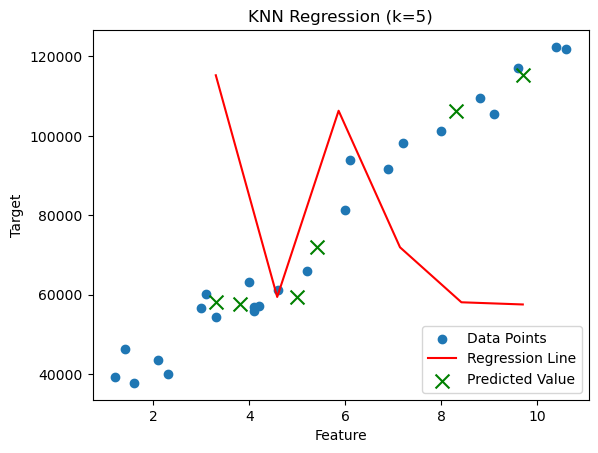

In [14]:
x_range = np.linspace(min(x_test.values), max(x_test.values), 6).reshape(-1, 1)

plt.scatter(x_train.values, y_train.values, label='Data Points')
plt.plot(x_range, y_pred, color='red', label='Regression Line')
plt.scatter(x_test.values, y_pred, color='green', marker='x', s=100, label='Predicted Value')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('KNN Regression (k=5)')
plt.show()